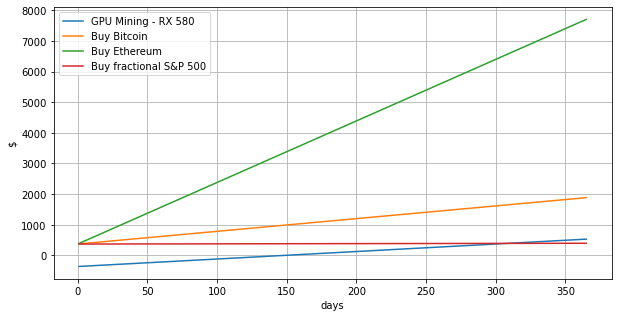

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import typing
%matplotlib inline

"""
If you want this notebook to be accurate, find the current pricecs of the GPU's 
and the current profittability rates. And update/add the current variables.
Values are valid for 2/26/2021, change daily manually. ETH is volatile so you should.
"""

#AED/USD conversion, use if you want
usd = lambda x: x/3.68
aed = lambda x: x*3.68


#GPU class
class GPU:
    def __init__(self, name: str,cost: float,daily_profit: float,fixed_cost: float,n: int,days: int,investment: bool):
        self.name = name
        self.cost = cost
        self.daily_profit = daily_profit
        self.fixed_cost = fixed_cost
        self.n = n
        self.days = days
        self.investment = investment

    def cashplot(self):
        if self.n != 1 or self.n != 0:
            self.cost = (self.cost*self.n)-(self.fixed_cost*(self.n-1))
            self.daily_profit = self.daily_profit*self.n


        cashsum_gpu = 0
        gpu_profit = [self.daily_profit for i in range(1,self.days)]
        gpu_cash = np.append([self.cost+self.daily_profit],gpu_profit) if self.investment \
        else np.append([-self.cost+self.daily_profit],gpu_profit)

        summed_list = []
        for v in gpu_cash:
            cashsum_gpu += v
            summed_list.append(cashsum_gpu)

        return summed_list
    
    def breakeven(self):
        if self.investment:
            return 0
        return self.cost//self.daily_profit
        

    def profit(self):
        if self.investment:
            return self.cashplot()[-1] - self.cost
        return self.cashplot()[-1]
    
    def plot(self):
        interval = range(1,self.days+1)
        plt.rcParams['figure.figsize'] = [10, 5] 
        plt.plot(interval, self.cashplot(), label=self.name)
        plt.ylabel('$')
        plt.xlabel('days')
        plt.legend()
        plt.grid(True)
        
        

def daily(initial,percentage,n): #For passing investment to GPU class, returns daily return over n days.
    dec = percentage/100
    final = initial*(1+dec)
    return (final - initial)/n

#GPU list, for investment pass same days in GPU class and daily function.
Inv_list = [
GPU('GPU Mining - RX 580',usd(1350),2.45,0,1,365,False),
GPU('Buy Bitcoin',usd(1350),daily(usd(1350),413,365),0,1,365,True),
GPU('Buy Ethereum',usd(1350),daily(usd(1350),2000,365),0,1,365,True),
GPU('Buy fractional S&P 500',usd(1350),daily(usd(1350),7,365),0,1,365,True)
]


#plotting
for v in Inv_list:
    v.plot()


In [2]:
#Df

gpu_list = [v.name for v in Inv_list]
daily_profit_list = [v.daily_profit for v in Inv_list]
cost_list = [v.cost for v in Inv_list]
annual_profit_list = [v.profit() for v in Inv_list]
value_list = [v.profit()/v.cost for v in Inv_list]
days_to_break_even = [v.breakeven() for v in Inv_list]

d = {'investment_choice': gpu_list,
     'daily_profit': daily_profit_list,
     'cost': cost_list,
    'profit' : annual_profit_list,
    'value': value_list,
    'days_to_breakeven': days_to_break_even}
     

df = pd.DataFrame(data=d)

In [3]:
df

,investment_choice,daily_profit,cost,profit,value,days_to_breakeven
0,GPU Mining - RX 580,2.450000,366.847826,527.402174,1.437659,149.0
1,Buy Bitcoin,4.150908,366.847826,1515.081522,4.130000,0.0
2,Buy Ethereum,20.101251,366.847826,7336.956522,20.000000,0.0
3,Buy fractional S&P 500,0.070354,366.847826,25.679348,0.070000,0.0


In [5]:
def investment(gpu_annual_profit,rateofreturn):
    """
    Will return the amount of usd you would have needed to invest to get equivalent profits
    Pass profit(summedlist_gpuname) as gpu_annual_profit
    And pass the real rate of return on your investment in %
    """
    return (gpu_annual_profit)/(rateofreturn/100)

print(investment(Inv_list[0].profit(),7)) #As you can see a 580 will return equivalent to ~7500 USD in ETF's.

7534.316770186301
